In [ ]:
def mutateRight(index,k, seq , queryList):
    i=index-(length-(k))
    seqC=[]
    seq=seq.upper()
    seq=seq.replace("N","A")
    for n in Nuc:
        if seq[i]==n:
            queryList.append(">" + chrom + "/" + str(start) + ":" + str(end) +"/"+ str(index+1) + "/ref/" + n + "\n" + seq )
        else:
            seqC=seq[:i] + n + seq[i+1:]
            #seqC[i]=n
            queryList.append(">" + chrom + "/" + str(start) +":"+str(end)+"/"+ str(index+1) + "/alt/" + n + "\n" + seqC )
            

In [28]:
import argparse
import pysam
import tempfile
import subprocess
import codecs
import sys
import os

from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
ref = pysam.FastaFile('/home/cmb-16/mjc/shared/references/hg38/hg38.fa')

chrom='chr6'
start=160609100
end=160648600

#length=end-start

k=32



Nucc=['A','C','G','T']
Nuc=set(Nucc)
#queries = open(args.queries, 'w')


            
def mutate(index, seq , queryList):
    NucList={'A':'C,G,T','C':'A,G,T','G':'A,C,T','T':'A,C,G'}
    seqC=[]
    seq=seq.upper()
    seq=seq.replace("N","A")
    altList=NucList[seq[k-1]].split(",")

    queryList.append(">" + chrom + "/" + str(start) + ":" + str(end) +"/"+ str(index+1) + "/ref/" + seq[k-1] + "\n" + seq )
    for n in altList:
        seqC=seq[:k-1] + n + seq[k:]
        queryList.append(">" + chrom + "/" + str(start) +":"+str(end)+"/"+ str(index+1) + "/alt/" + n + "\n" + seqC )



pre=ref.fetch(chrom, start-1-(k-1), end-1+(k-1))
#pre=ref.fetch(chrom)#, start-1, end-1)


length=len(pre)
#ii=range(31,length-1)
ii=range(31,(length-1)-(k-1)+1)


len(pre)

39562

In [53]:
queryList=[]
seen=set()




In [54]:
a,b,c=0,0,0
for i in ii:
    seq=pre[i-(k-1):i+k]
    if seq in seen:
        a=a+1
        continue
    mutate(i, seq  ,  queryList )
    seen.add(seq)
    
#    if i<31:
 #       a=a+1
  #      continue
   #     mutateLeft(i, pre[:i+k], queryList )
   # elif i>=length-(k):
   #     c=c+1
    #    continue
     #   mutateRight(i ,k-1 ,pre[i-(k-1):], queryList )
    #else:
     #   mutate(i,   pre[i-(k-1):i+k+1],  queryList )
      #  b=b+1


In [55]:
print(len(queryList),len(seen),a)
queryList[0]



55828 13957 25543


'>chr6/160609100:160648600/32/ref/T\nTTTATTACATATTCATCTTTTTTTAAATATTTGAAATAGTTATCTTAGTCATATGTCAAATTT'

In [56]:
ll=[ queryList[i] for i in range(len(queryList)) if i%4==0 ]
len(ll)           

13957

In [57]:
ll[-1]

'>chr6/160609100:160648600/39531/ref/T\nGTTTGTAAGCTTATACATGTTTGAGTGTGTGTGTATGCATGCGTGTGTTTTGTATGTGTGTAT'

In [11]:
ini=32
a=0
for r in ll:
    index=r.split("/")
    index=index[2]
    if int(index)-ini==1:
        ini=int(index)
        a=a+1
        continue
    else:
        print(index)
        ini=int(index)
print(a)

32
39437


In [58]:
queryList[::-10][:10]

['>chr6/160609100:160648600/39531/alt/G\nGTTTGTAAGCTTATACATGTTTGAGTGTGTGGGTATGCATGCGTGTGTTTTGTATGTGTGTAT',
 '>chr6/160609100:160648600/39529/alt/A\nGTGTTTGTAAGCTTATACATGTTTGAGTGTGAGTGTATGCATGCGTGTGTTTTGTATGTGTGT',
 '>chr6/160609100:160648600/39526/alt/T\nTGTGTGTTTGTAAGCTTATACATGTTTGAGTTTGTGTGTATGCATGCGTGTGTTTTGTATGTG',
 '>chr6/160609100:160648600/39524/alt/A\nTGTGTGTGTTTGTAAGCTTATACATGTTTGAATGTGTGTGTATGCATGCGTGTGTTTTGTATG',
 '>chr6/160609100:160648600/39521/alt/G\nGTGTGTGTGTGTTTGTAAGCTTATACATGTTGGAGTGTGTGTGTATGCATGCGTGTGTTTTGT',
 '>chr6/160609100:160648600/39519/alt/A\nATGTGTGTGTGTGTTTGTAAGCTTATACATGATTGAGTGTGTGTGTATGCATGCGTGTGTTTT',
 '>chr6/160609100:160648600/39516/alt/T\nTGGATGTGTGTGTGTGTTTGTAAGCTTATACTTGTTTGAGTGTGTGTGTATGCATGCGTGTGT',
 '>chr6/160609100:160648600/39514/alt/C\nTGTGGATGTGTGTGTGTGTTTGTAAGCTTATCCATGTTTGAGTGTGTGTGTATGCATGCGTGT',
 '>chr6/160609100:160648600/39511/alt/G\nATTTGTGGATGTGTGTGTGTGTTTGTAAGCTGATACATGTTTGAGTGTGTGTGTATGCATGCG',
 '>chr6/160609100:160648600/39509/alt

In [59]:
query = '\n'.join(queryList).rstrip() + "\n"

In [60]:
hgjf='/panfs/qcb-panasas/rdagnew/hg38.no_alts.32.jf'
jf='/panfs/qcb-panasas/rdagnew/HG00514.IL.32.mer_counts.jf'

query[0:100]

'>chr6/160609100:160648600/32/ref/T\nTTTATTACATATTCATCTTTTTTTAAATATTTGAAATAGTTATCTTAGTCATATGTCAAATTT\n>'

In [61]:
sys.stderr.write("making hg query\n")


command = "jellyfish query --load --sequence=/dev/stdin {}".format(hgjf)

sys.stderr.write("Submitting query " + str(len(query)/2) + "\n")
proc        = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stdin=subprocess.PIPE)
proc_stdout = proc.communicate(input=bytes(query, 'utf-8'))
allLines    = codecs.latin_1_decode(proc_stdout[0])[0]
jfRefRes       = allLines.split("\n")


print("hg has " + str(len(jfRefRes)))
if jfRefRes[-1] == '':
    del jfRefRes[-1] 

making hg query
Submitting query 2827184.0


hg has 1786497


In [62]:
out=[]
results_idx = 0
for idx in range(int(len(queryList)/4)):
    ref_idx = 4*idx
    alt_idx = 4*idx + 1
    alt_idx2 = 4*idx + 2
    alt_idx3 = 4*idx + 3

    #both sequences include comment line so we split them
    ref_id,ref_seq = queryList[ref_idx].split('\n')
    alt_id,alt_seq = queryList[alt_idx].split('\n')
    alt_id2,alt_seq2 = queryList[alt_idx2].split('\n')
    alt_id3,alt_seq3= queryList[alt_idx3].split('\n')

    num_ref_results = len(ref_seq) - (k-1)

    #ref_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_ref_results]]
    ref_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_ref_results]]
    results_idx += num_ref_results

    #grabbing alt results
    num_alt_results = len(alt_seq) - (k-1)
   # alt_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
    alt_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
    results_idx += num_alt_results

    num_alt_results = len(alt_seq2) - (k-1)
    alt_hg_counts2 = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
    results_idx += num_alt_results

    num_alt_results = len(alt_seq3) - (k-1)
    alt_hg_counts3 = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
    results_idx += num_alt_results

    ref_hg_str = ','.join(ref_hg_counts)
    alt_hg_str = ','.join(alt_hg_counts)
    alt_hg_str2 = ','.join(alt_hg_counts2)

    alt_hg_str3 = ','.join(alt_hg_counts3)

    contig=queryList[ref_idx]
    contig=contig.replace("\n","\t")
    cont=contig.split()[0]
    
    out.append('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(cont,ref_seq,alt_seq,ref_hg_str,alt_hg_str,alt_hg_str2,alt_hg_str3))

In [63]:
len(out)


13957

In [64]:
out[0]

'>chr6/160609100:160648600/32/ref/T\tTTTATTACATATTCATCTTTTTTTAAATATTTGAAATAGTTATCTTAGTCATATGTCAAATTT\tTTTATTACATATTCATCTTTTTTTAAATATTAGAAATAGTTATCTTAGTCATATGTCAAATTT\t1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n'

In [65]:
sys.stderr.write("querying il jf \n")


command = "jellyfish query --load --sequence=/dev/stdin {}".format(jf)

proc        = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stdin=subprocess.PIPE)
proc_stdout = proc.communicate(input=bytes(query, 'utf-8'))
allLines    = codecs.latin_1_decode(proc_stdout[0])[0]
jfRes    = allLines.split("\n")


print("il has " + str(len(jfRes)))
if jfRes[-1] == '':
    del jfRes[-1] 

querying il jf 


il has 1786497


In [66]:
results_idx = 0
outIL=[]
for idx in range(int(len(queryList)/4)):
        ref_idx = 4*idx
        alt_idx = 4*idx + 1
        alt_idx2 = 4*idx + 2
        alt_idx3 = 4*idx + 3
        
        #both sequences include comment line so we split them
        ref_id,ref_seq = queryList[ref_idx].split('\n')
        alt_id,alt_seq = queryList[alt_idx].split('\n')
        alt_id2,alt_seq2 = queryList[alt_idx2].split('\n')
        alt_id3,alt_seq3= queryList[alt_idx3].split('\n')
        
        num_ref_results = len(ref_seq) - (k-1)

        #ref_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_ref_results]]
        ref_il_counts = [result.split()[1] for result in jfRes[results_idx:results_idx+num_ref_results]]
        results_idx += num_ref_results
        
        #grabbing alt results
        num_alt_results = len(alt_seq) - (k-1)
       # alt_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
        alt_il_counts = [result.split()[1] for result in jfRes[results_idx:results_idx+num_alt_results]]
        results_idx += num_alt_results
        
        num_alt_results = len(alt_seq2) - (k-1)
       # alt_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
        alt_il_counts2 = [result.split()[1] for result in jfRes[results_idx:results_idx+num_alt_results]]
        results_idx += num_alt_results
        
        num_alt_results = len(alt_seq3) - (k-1)
       # alt_hg_counts = [result.split()[1] for result in jfRefRes[results_idx:results_idx+num_alt_results]]
        alt_il_counts3 = [result.split()[1] for result in jfRes[results_idx:results_idx+num_alt_results]]
        results_idx += num_alt_results
        
        ref_il_str = ','.join(ref_il_counts)
     #   alt_hg_str = ','.join(alt_hg_counts)
        alt_il_str = ','.join(alt_il_counts)
        alt_il_str2 = ','.join(alt_il_counts2)

        alt_il_str3 = ','.join(alt_il_counts3)
        contig=queryList[ref_idx]
        contig=contig.replace("\n","\t")
        cont=contig.split()[0]
        outIL.append('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(cont,ref_seq,alt_seq,ref_il_str,alt_il_str,alt_il_str2,alt_il_str3))
        

In [67]:
len(outIL)

13957

In [68]:
hgs="query_out/"+chrom+":"+str(start)+"-"+str(end)+".out"
with open(hgs,'w') as a:
    for r in range(len(out)):
        o=out[r].split()[2:]
        oI=outIL[r].split()[3:]
        a.write( "\t".join( ["\t".join(o),"\t".join(oI)] ) +"\n" )

In [69]:
out[0]

'>chr6/160609100:160648600/32/ref/T\tTTTATTACATATTCATCTTTTTTTAAATATTTGAAATAGTTATCTTAGTCATATGTCAAATTT\tTTTATTACATATTCATCTTTTTTTAAATATTAGAAATAGTTATCTTAGTCATATGTCAAATTT\t1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n'

In [70]:
import numpy as np
from statistics import mean,median
hgmeans=[[],[],[],[]]
hgmedians=[[],[],[],[]]
for line in out:
    line=line.rstrip()
    cts=line.split()[3:]
    for i in range(4):
        ct=[int( r) for r in cts[i].split(",")]
        m=mean(ct)
        med=median(ct)
        hgmeans[i].append(m)
        hgmedians[i].append(med)

In [71]:
ilmeans=[[],[],[],[]]
ilmedians=[[],[],[],[]]
for line in outIL:
    line=line.rstrip()
    cts=line.split()[3:]
    for i in range(4):
        ct=[int( r) for r in cts[i].split(",")]
        m=mean(ct)
        med=median(ct)
        ilmeans[i].append(m)
        ilmedians[i].append(med)

In [72]:
hgmeans[0][:10]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [73]:
hgmedians[0][:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [74]:
ilmeans[0][:10]



[68.71875,
 68.59375,
 68.5,
 68.46875,
 68.46875,
 68.40625,
 68.40625,
 68.375,
 68.375,
 68.28125]

In [75]:
ilmedians[0][:10]



[67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0]

In [76]:
allele={0:'ref',1:'alt',2:'alt2',3:'alt3'}
qs=['hg','il','ccs']

def ct_loop(ct,ct_med,query,xlimm):
    for i in range(4):
        plot_ct(ct,ct_med,i,query,xlimm)
        
def plot_ct(ct,ct_med,i,query,xlimm):
    al=allele[i]    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    max_ =  int(np.max(ct[i]))
    max_m = int(np.max(ct_med[i]) )
    #print(max_,max_m)
    lims =  min( max_ , max_m )
    x=range(lims)
    ax.plot(x,x,c='red')
    ax.scatter(ct[i],ct_med[i],s=1.5)
    ax.set_title(" ".join([al,"query", query]))
    ax.set_xlabel("mean")
    ax.set_ylabel("median")
    ax.set_xlim(0,xlimm)
    ax.set_ylim(0,xlimm)

In [77]:
def hist_loop(ct,ct_med,query,minn,maxx,tf,binsize):
    for i in range(4):
        plot_hist(ct,ct_med,i,query,minn,maxx,tf,binsize)
#        plot_hist(ct_med,i,query,minn,maxx,'median',tf,binsize)


def plot_hist(ct,ct_med,i,query,minn,maxx,tf,binsize):
    al=allele[i]    
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(121)
    ax.hist(ct[i],bins=range(minn,maxx,binsize),cumulative=tf,edgecolor='red',linewidth=0.3)
    ax.set_title(" ".join([al,"query", query,": mean"]))
    
    
    ax = fig.add_subplot(122)
    ax.hist(ct_med[i],bins=range(minn,maxx,binsize),cumulative=tf,edgecolor='red',linewidth=0.3)
    ax.set_title(" ".join([al,"query", query,": median"]))
    
    

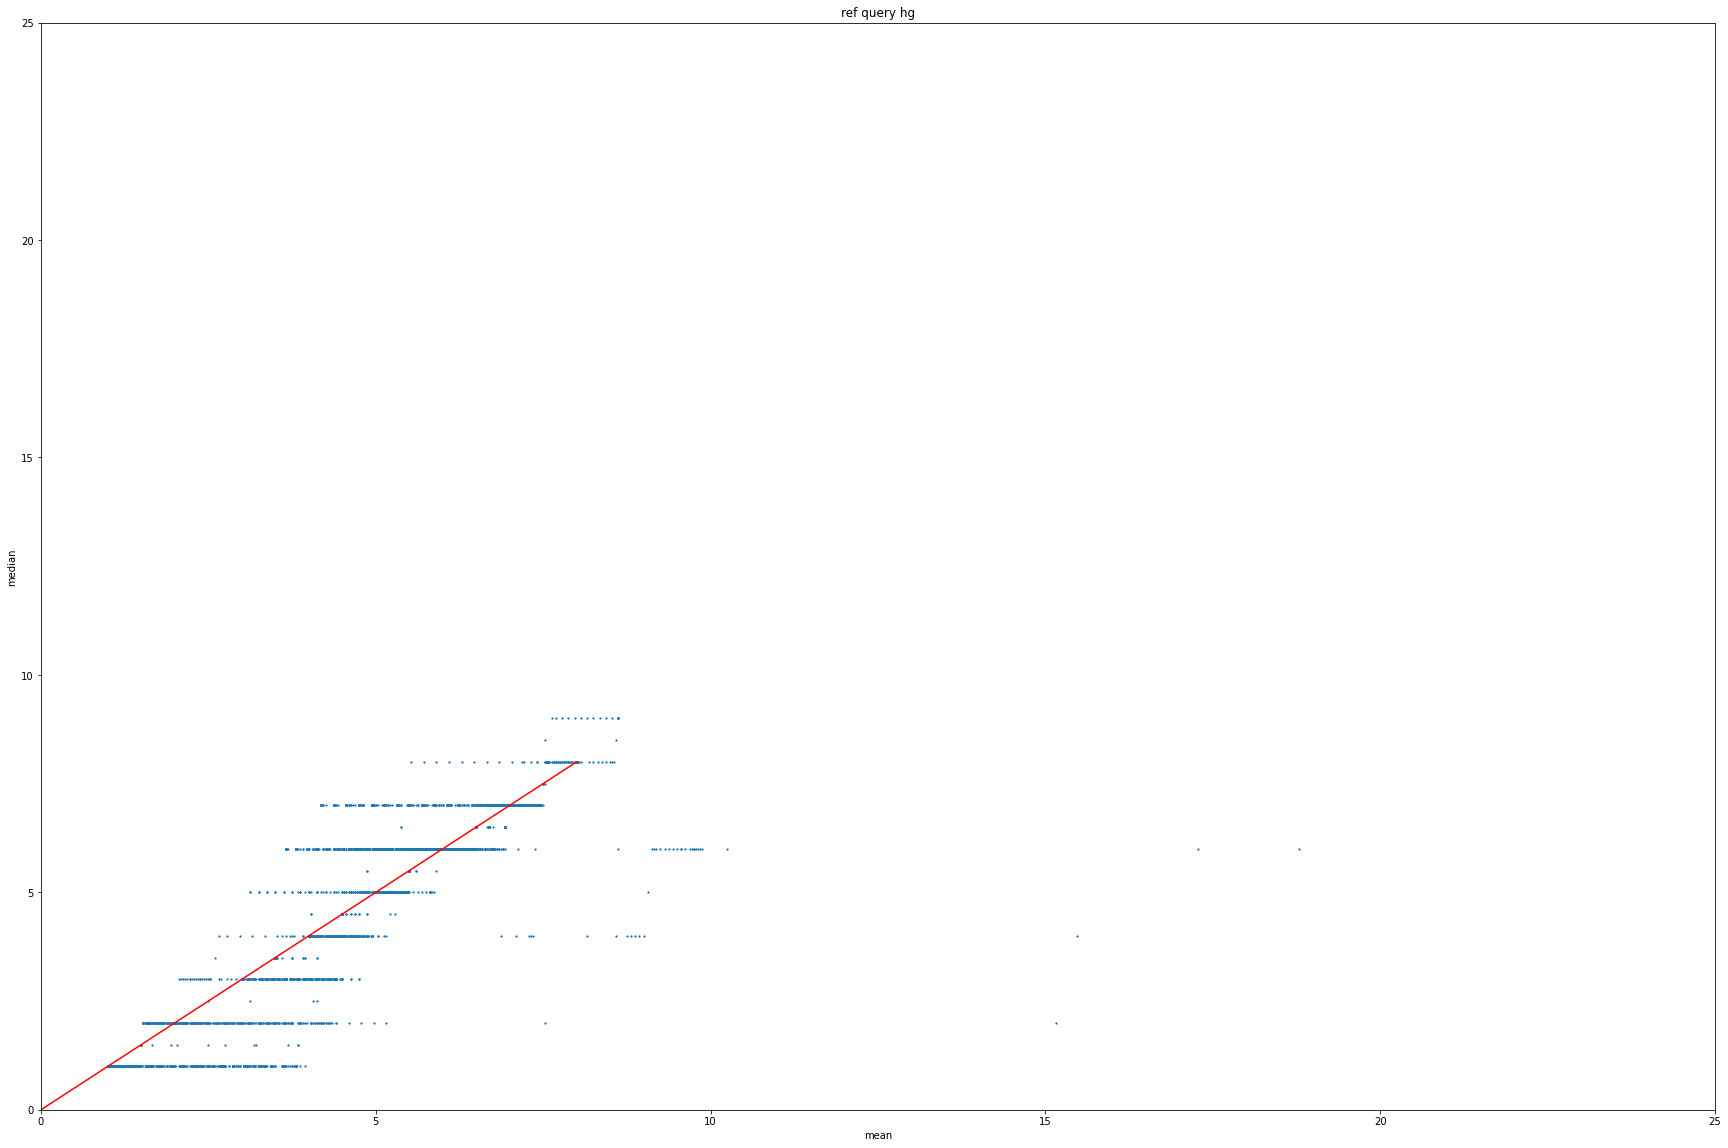

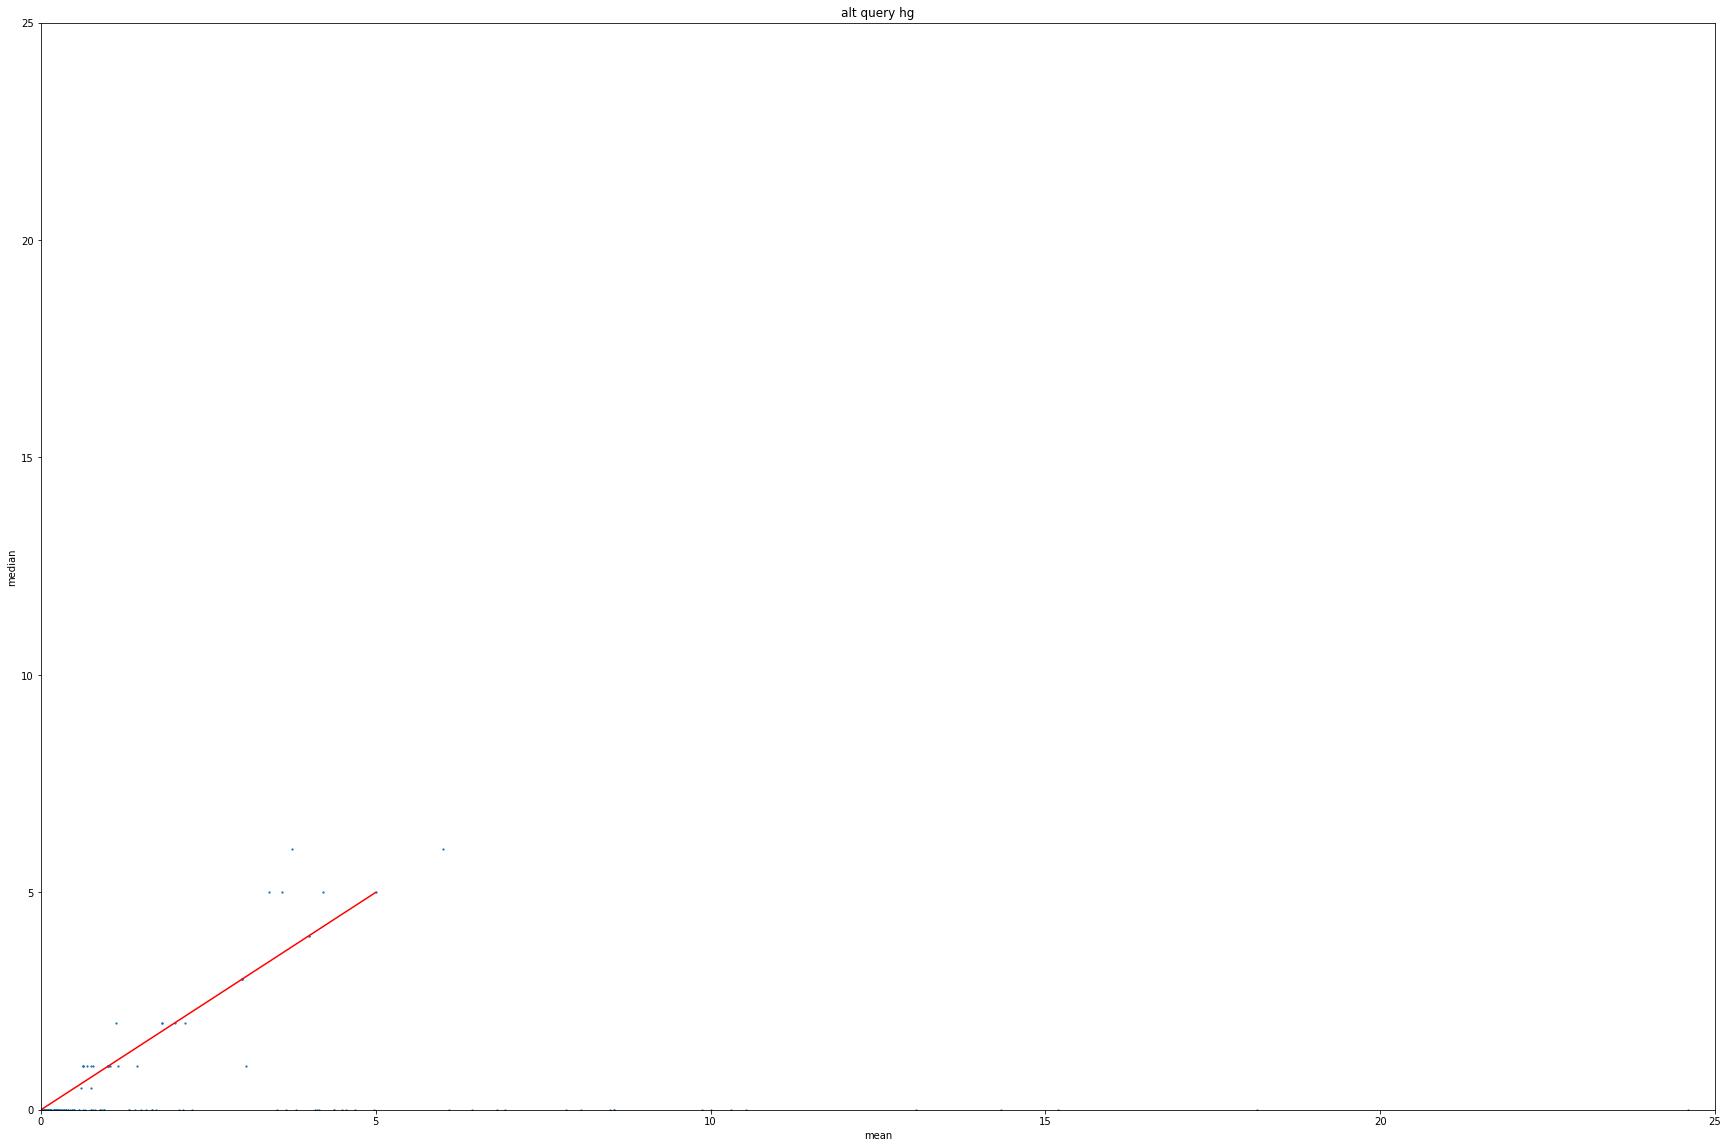

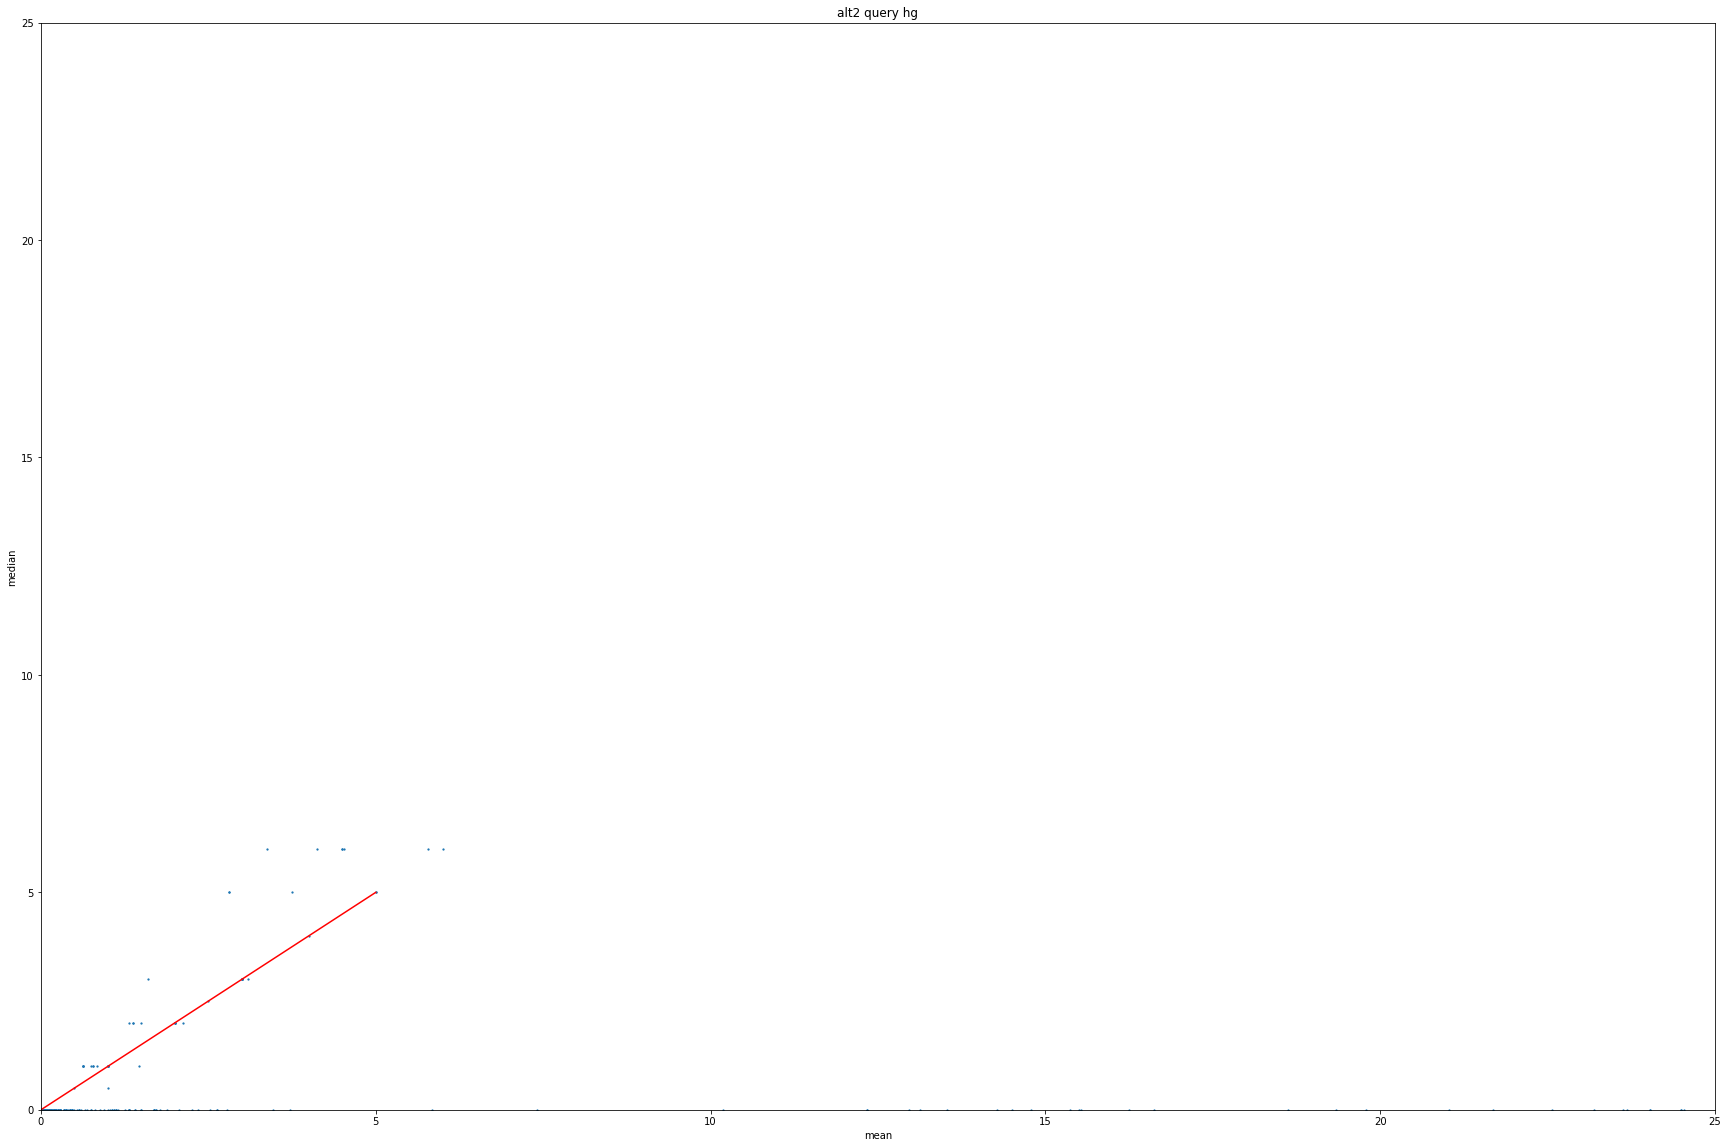

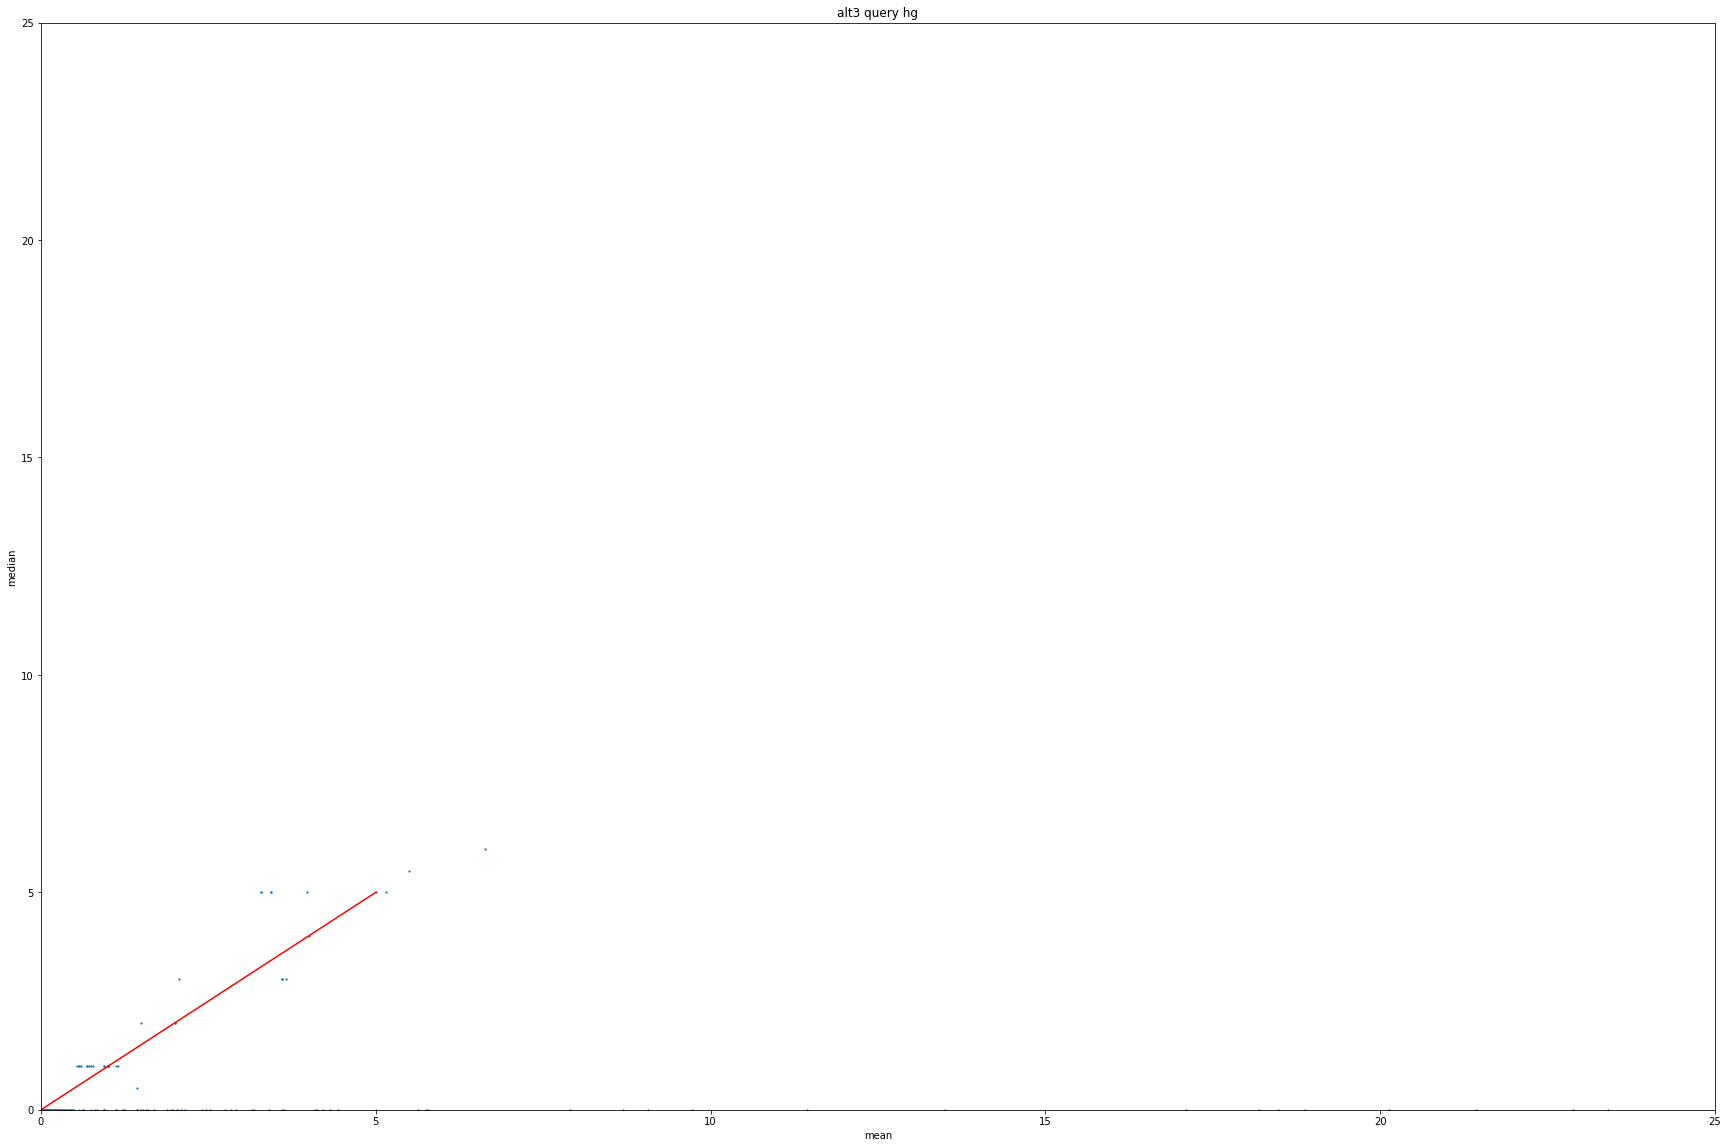

In [78]:
ct_loop(hgmeans,hgmedians,'hg',25)

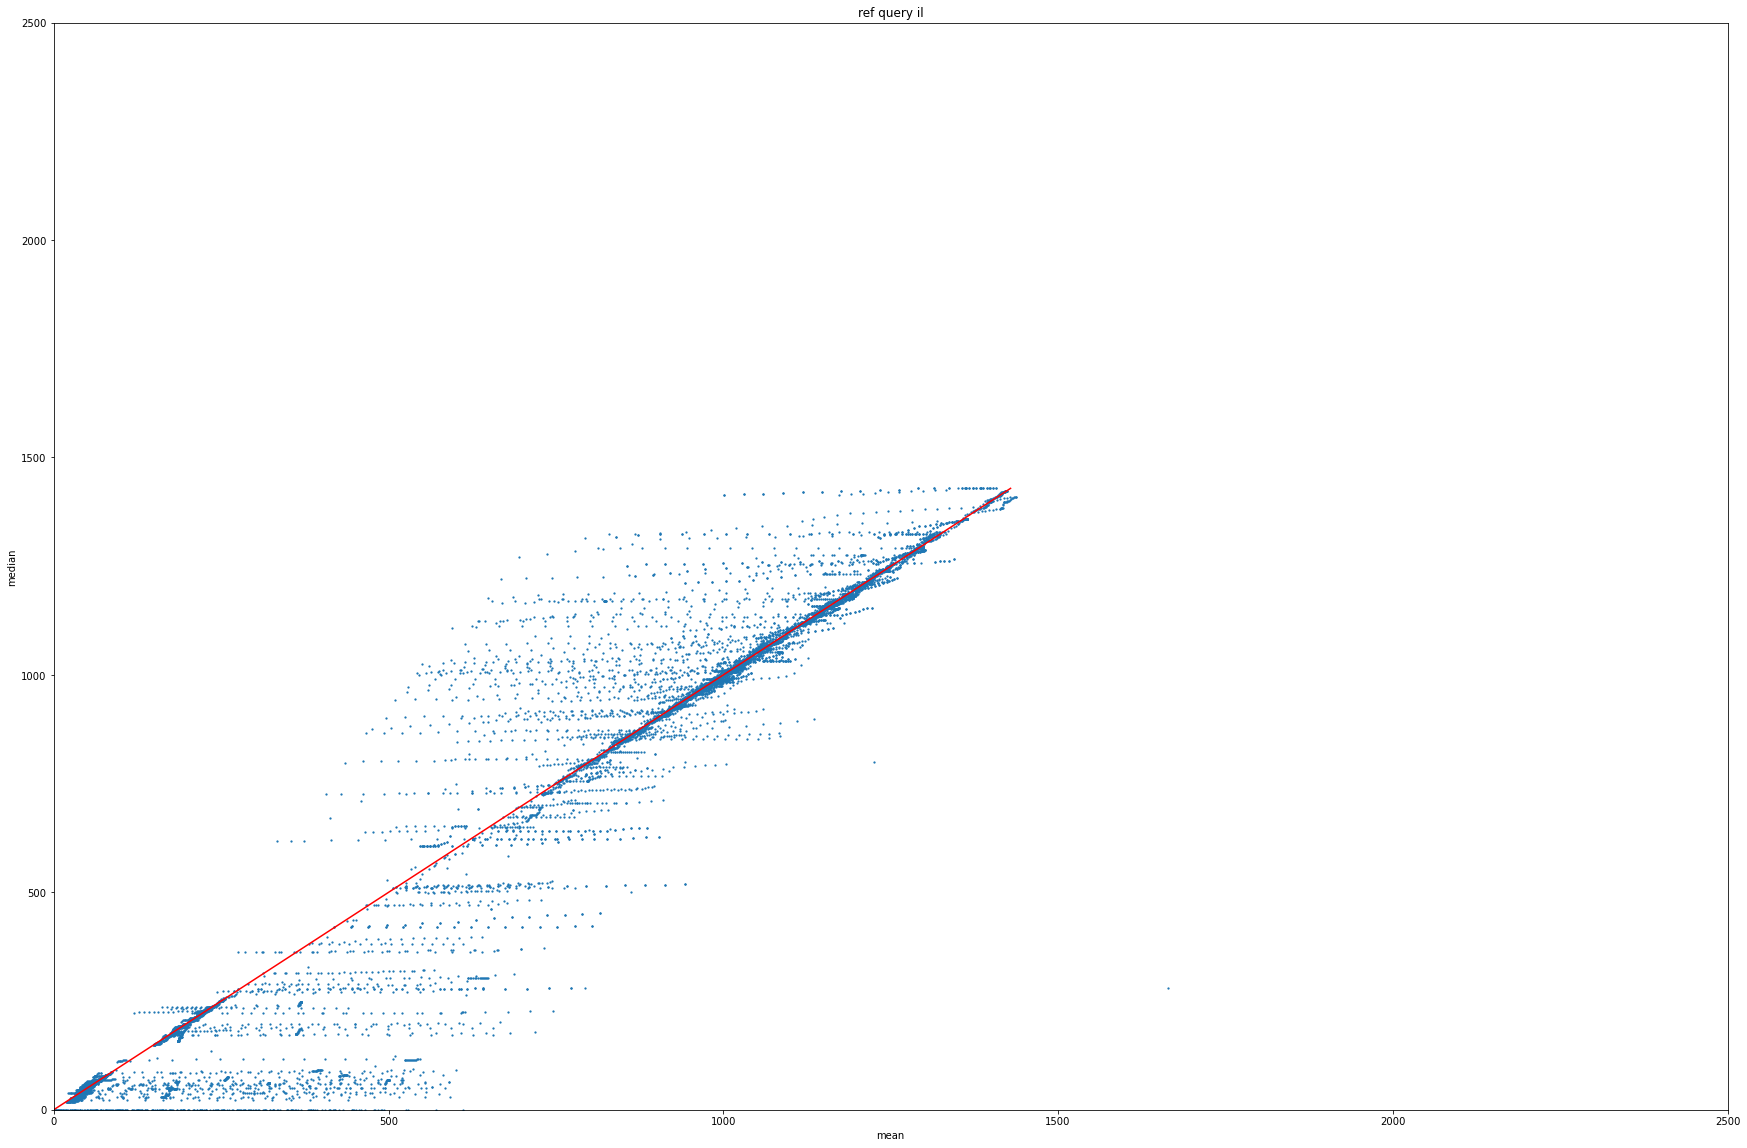

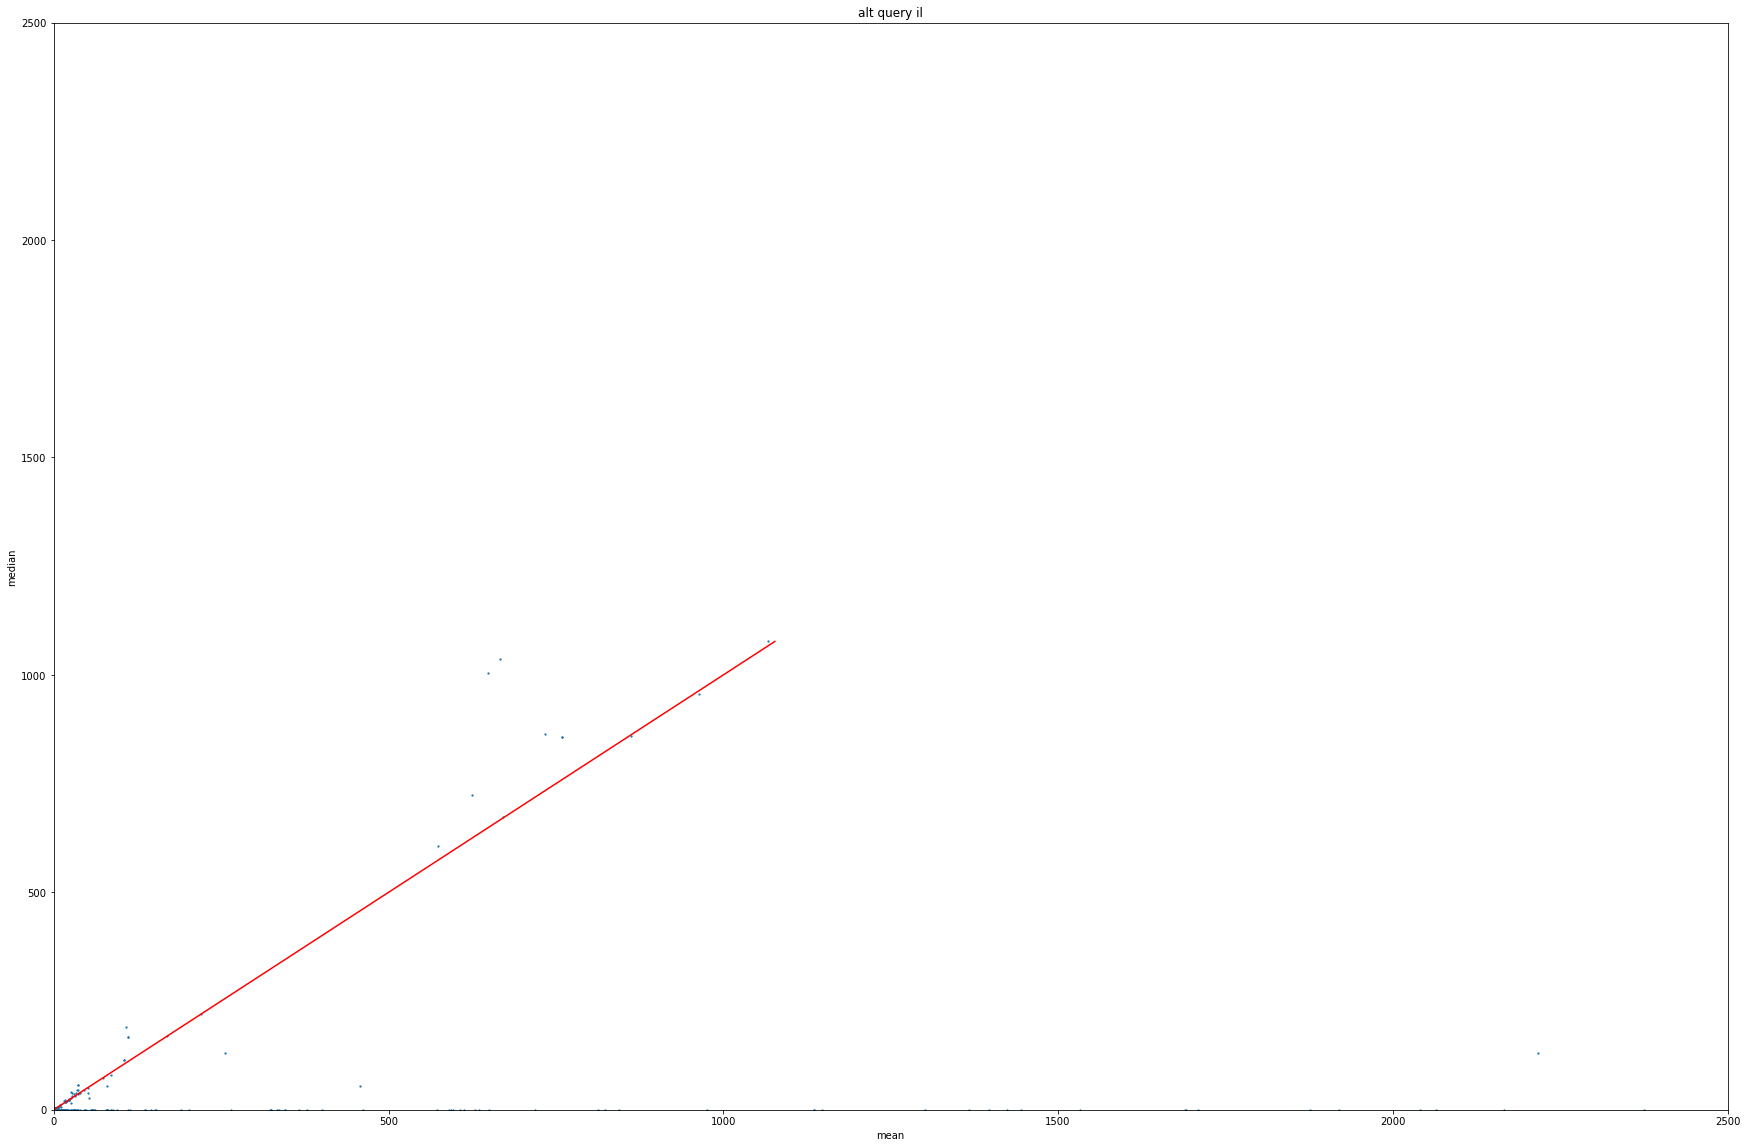

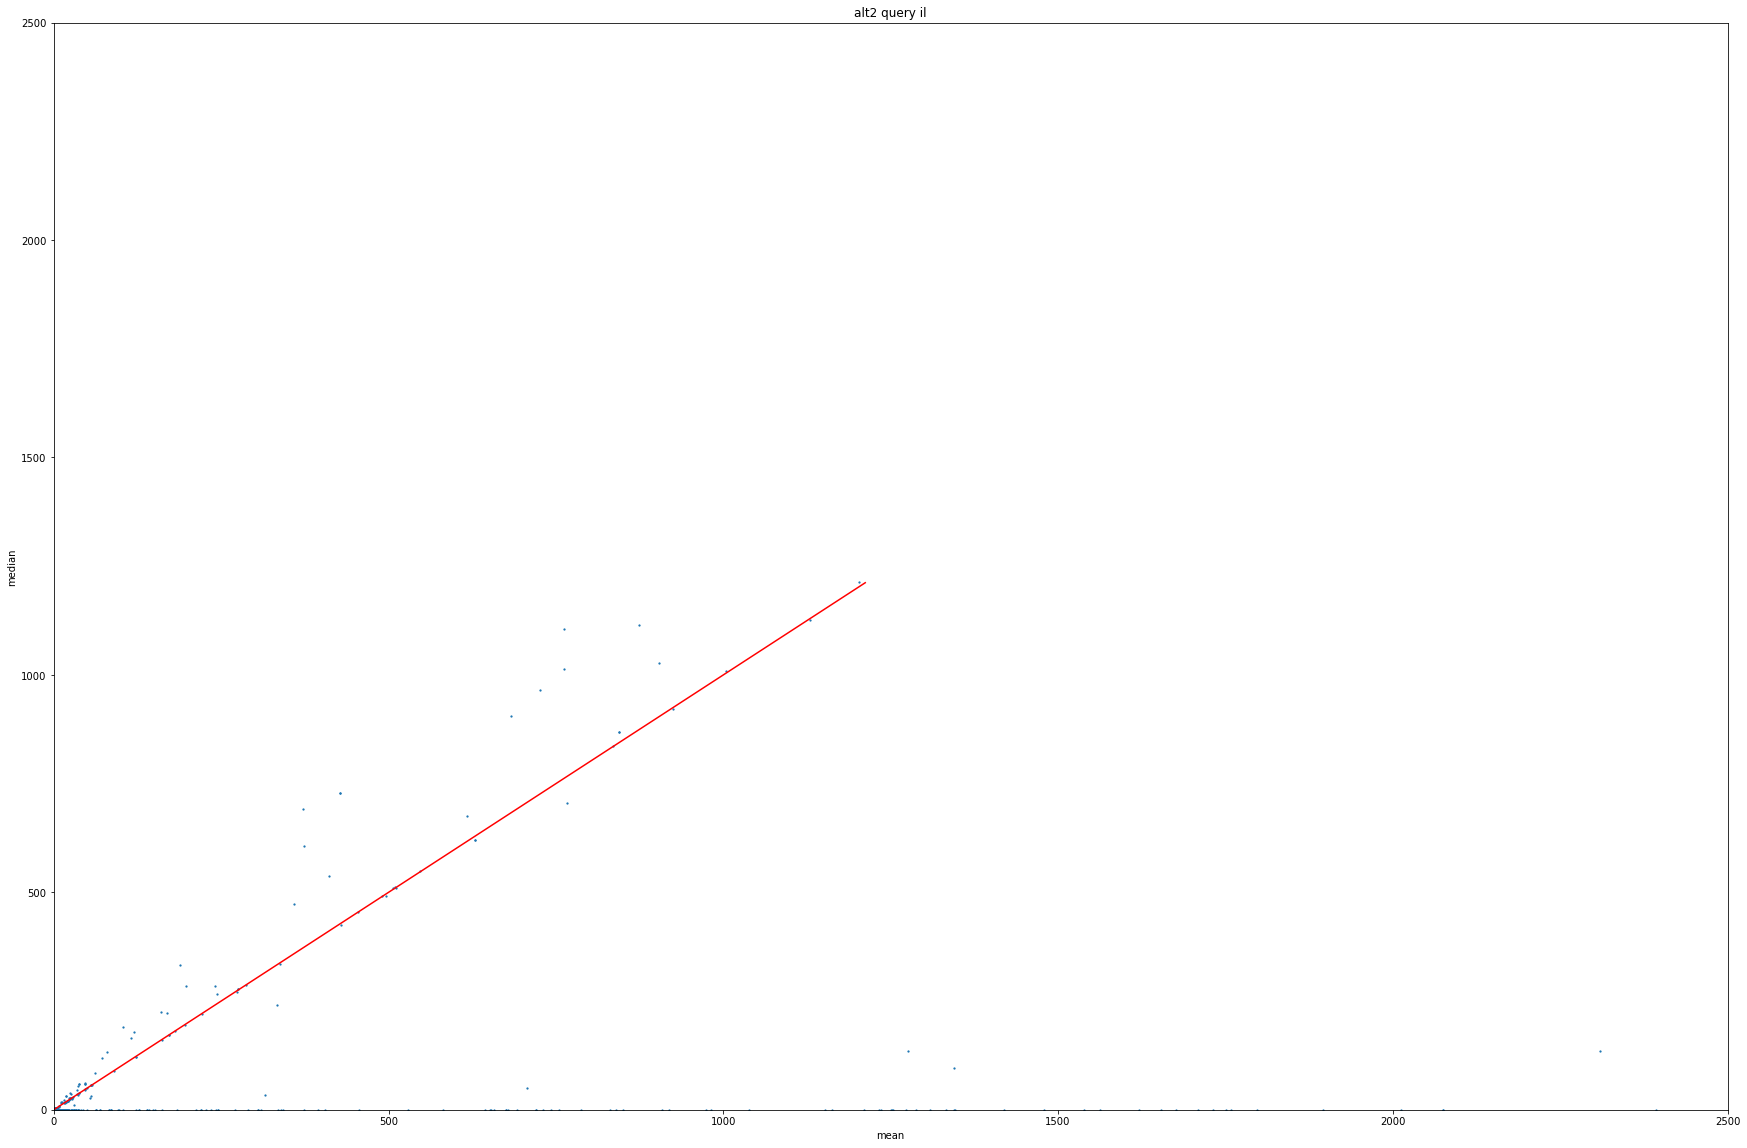

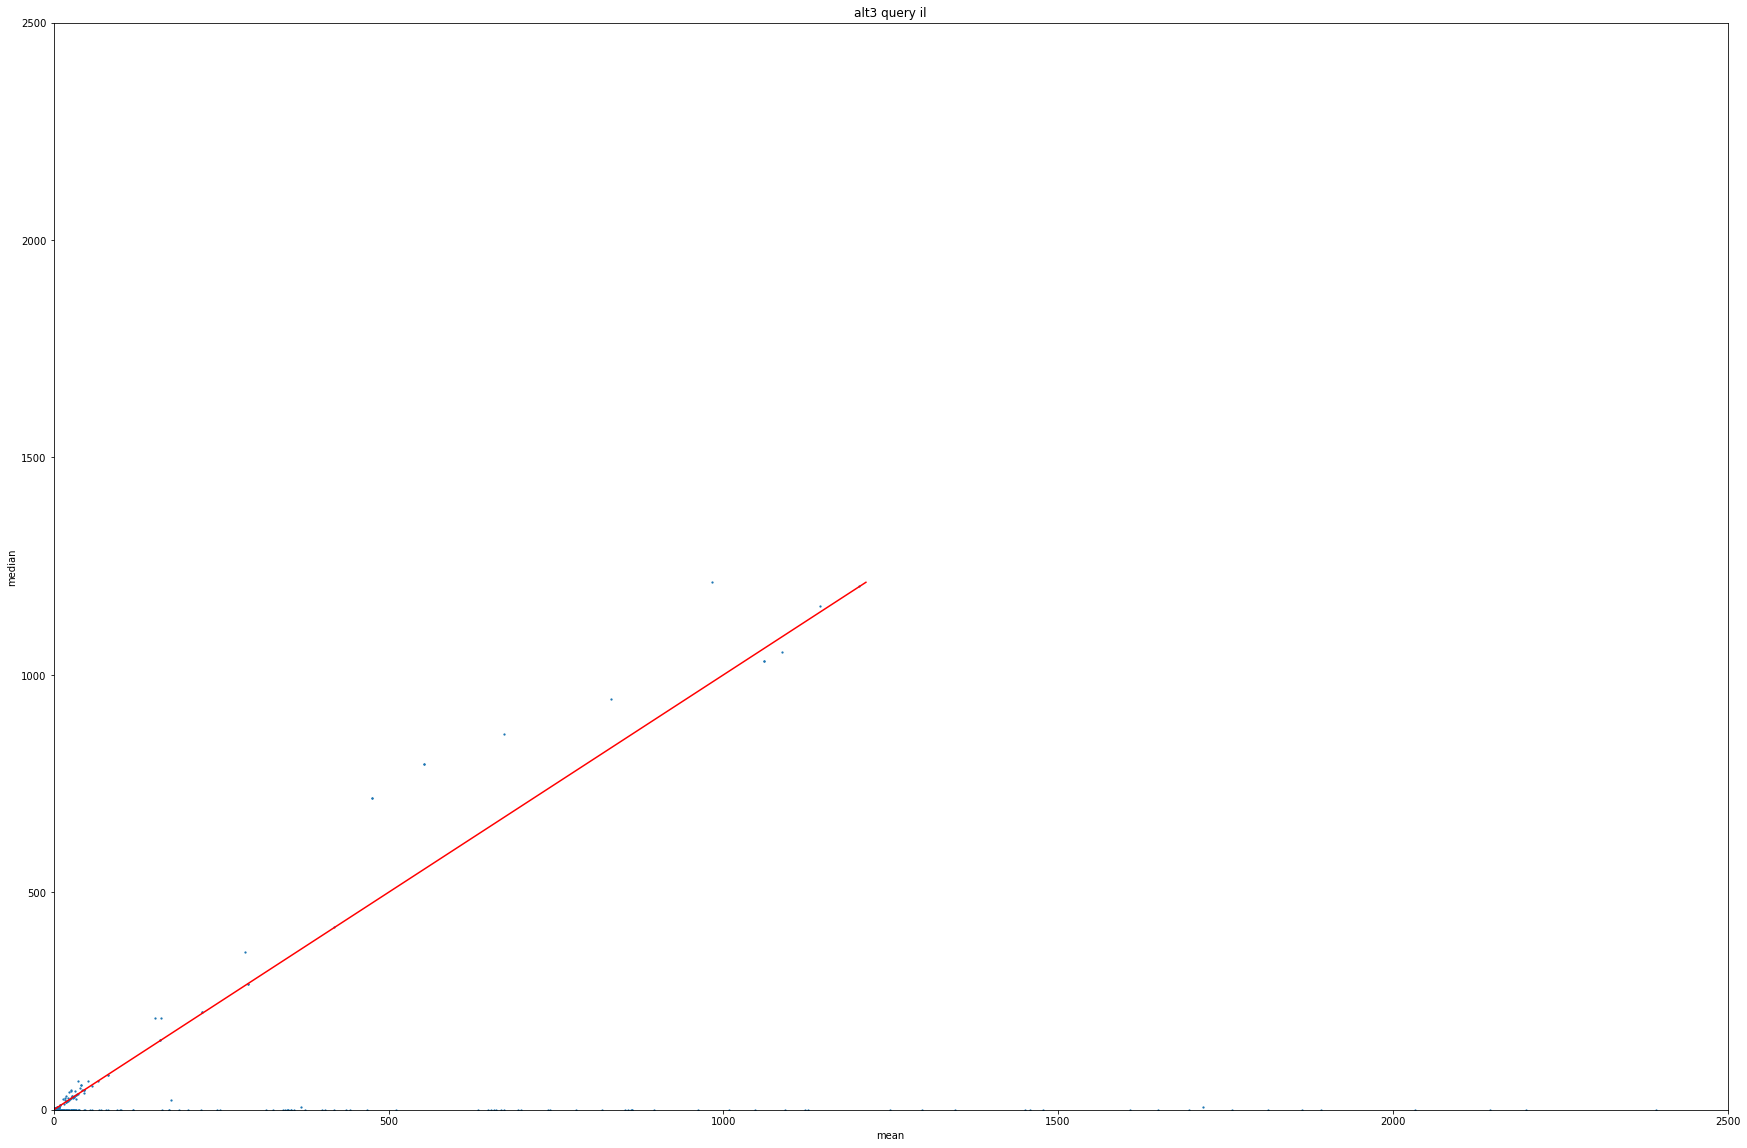

In [79]:
ct_loop(ilmeans,ilmedians,'il',2500)

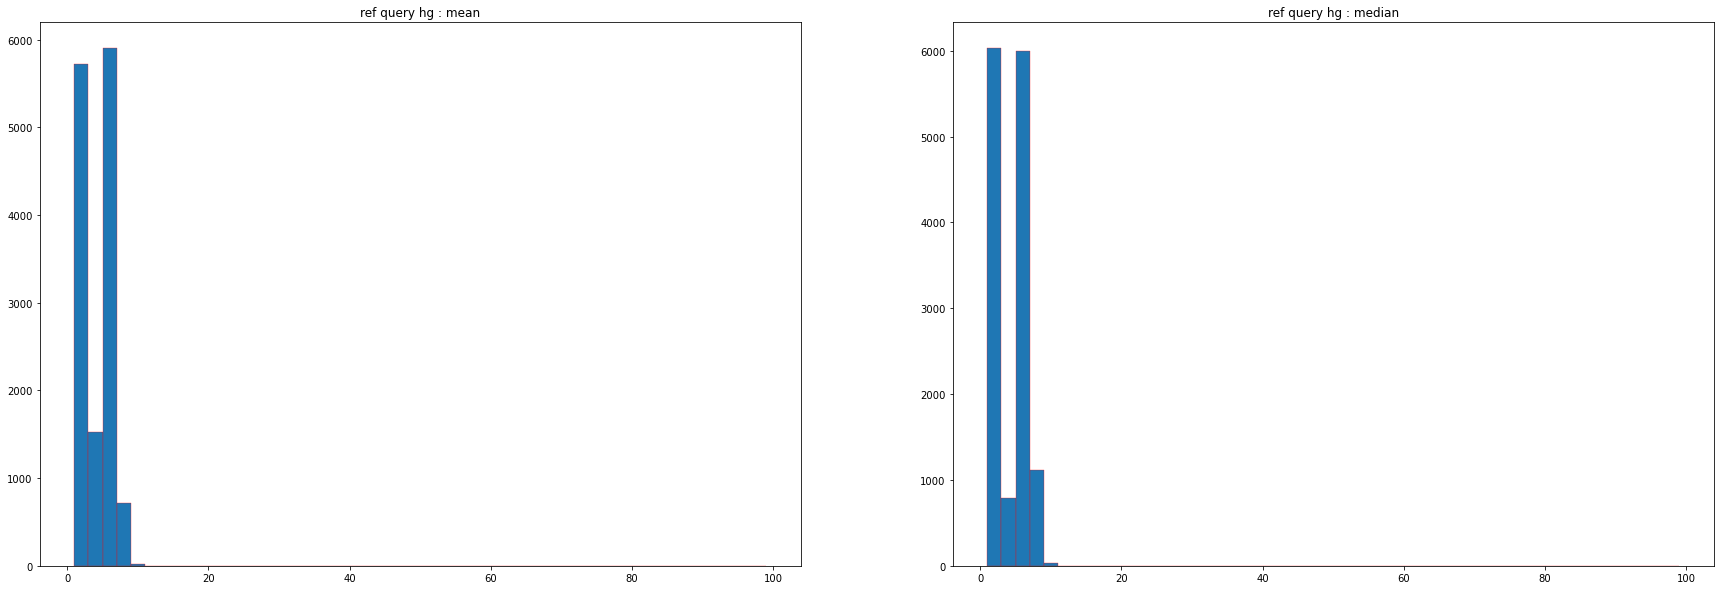

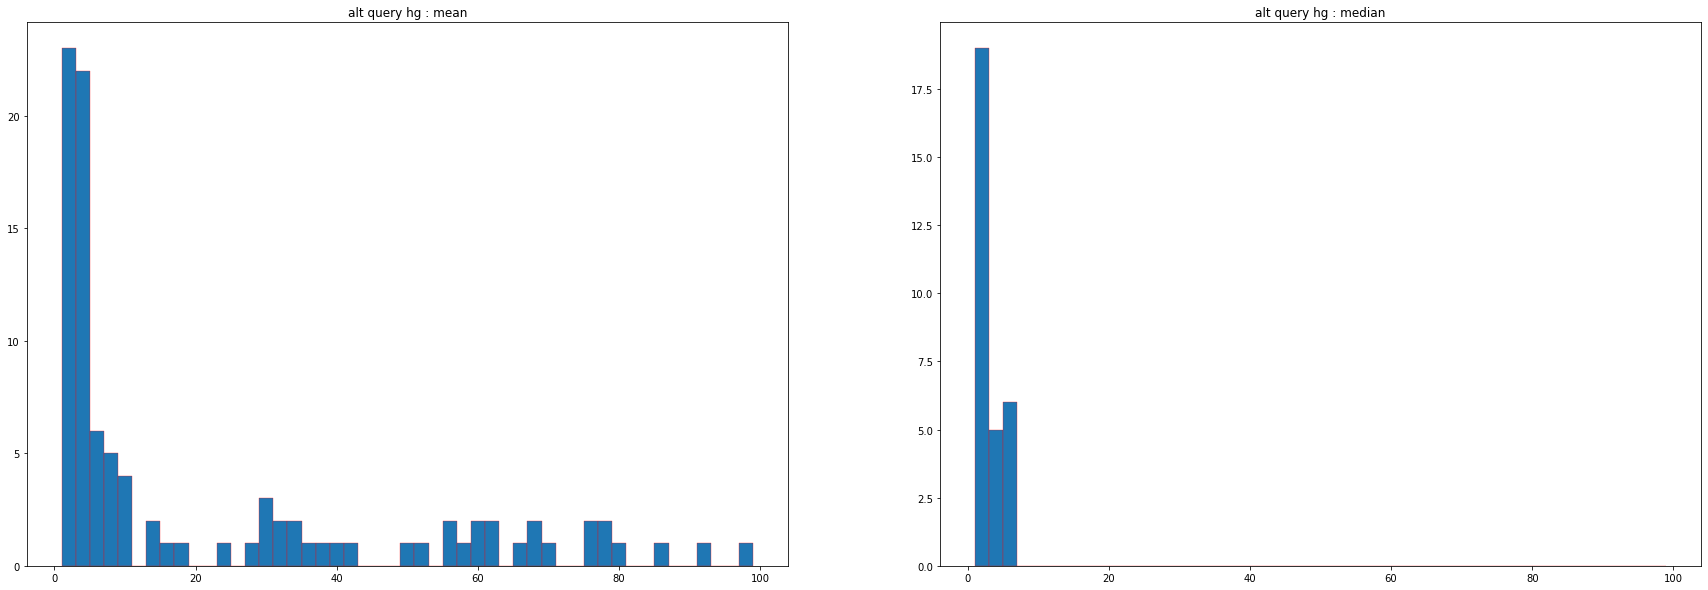

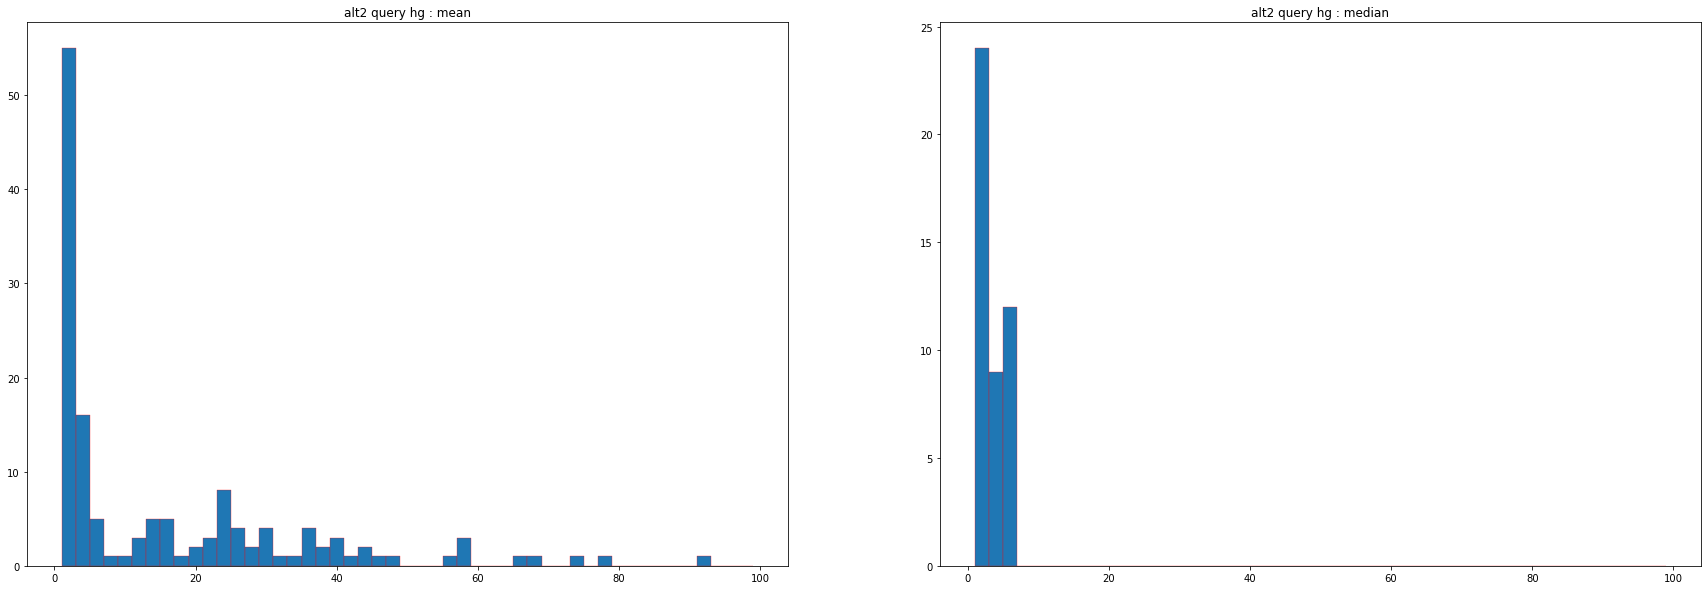

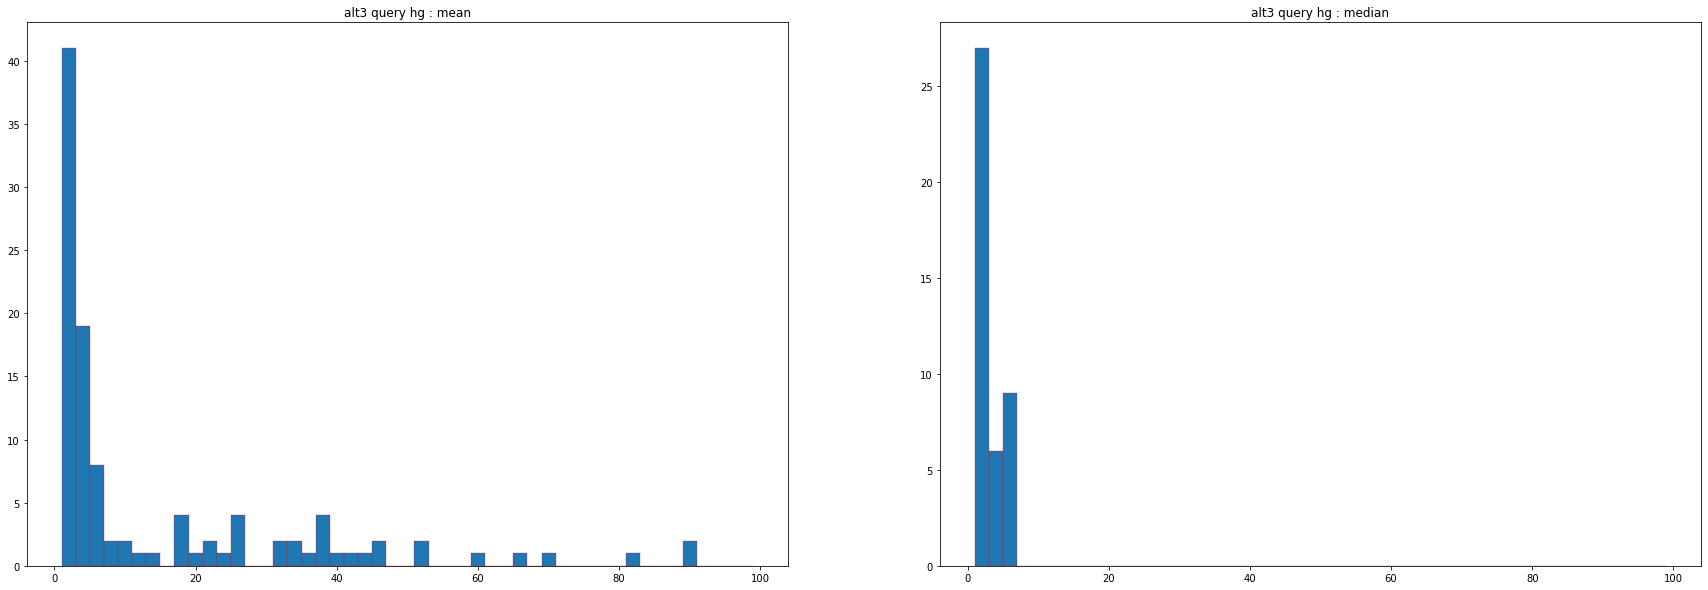

In [82]:
hist_loop(hgmeans,hgmedians,'hg',1,100,False,2)

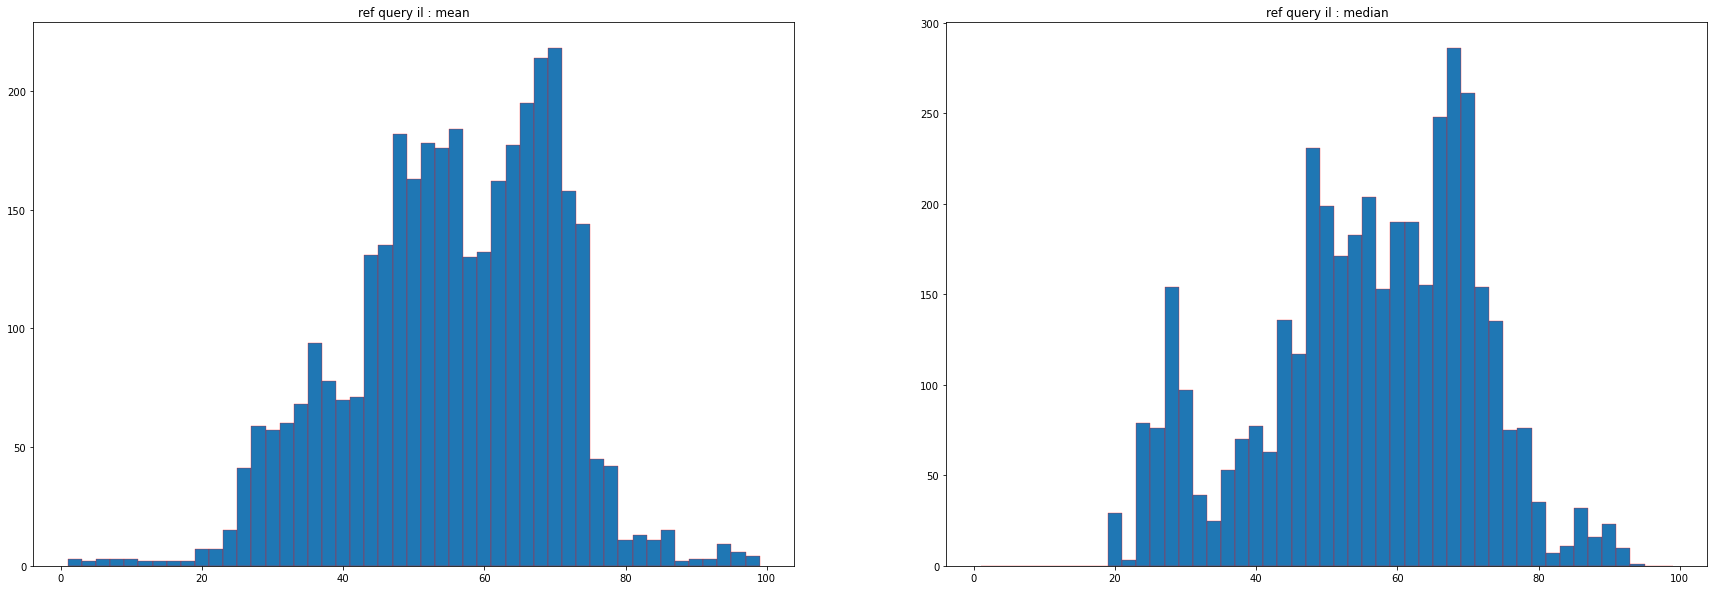

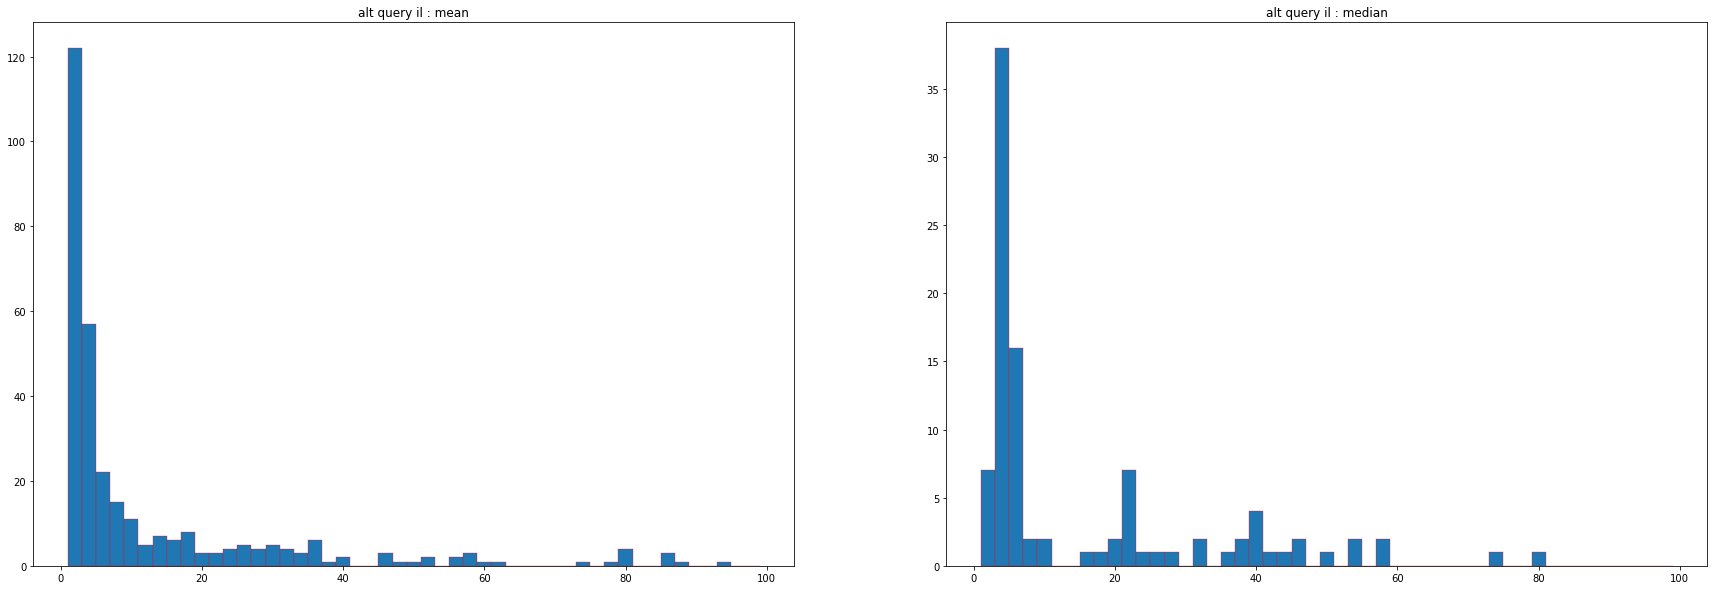

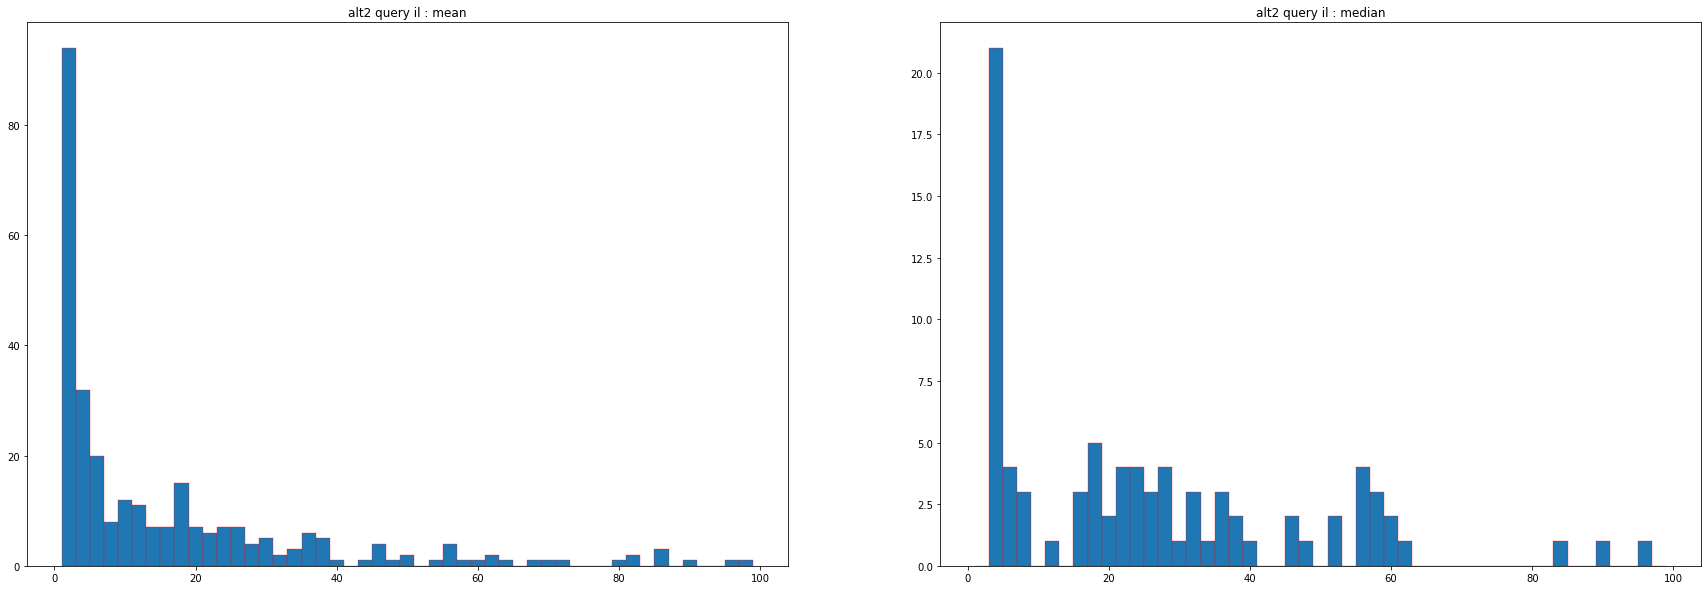

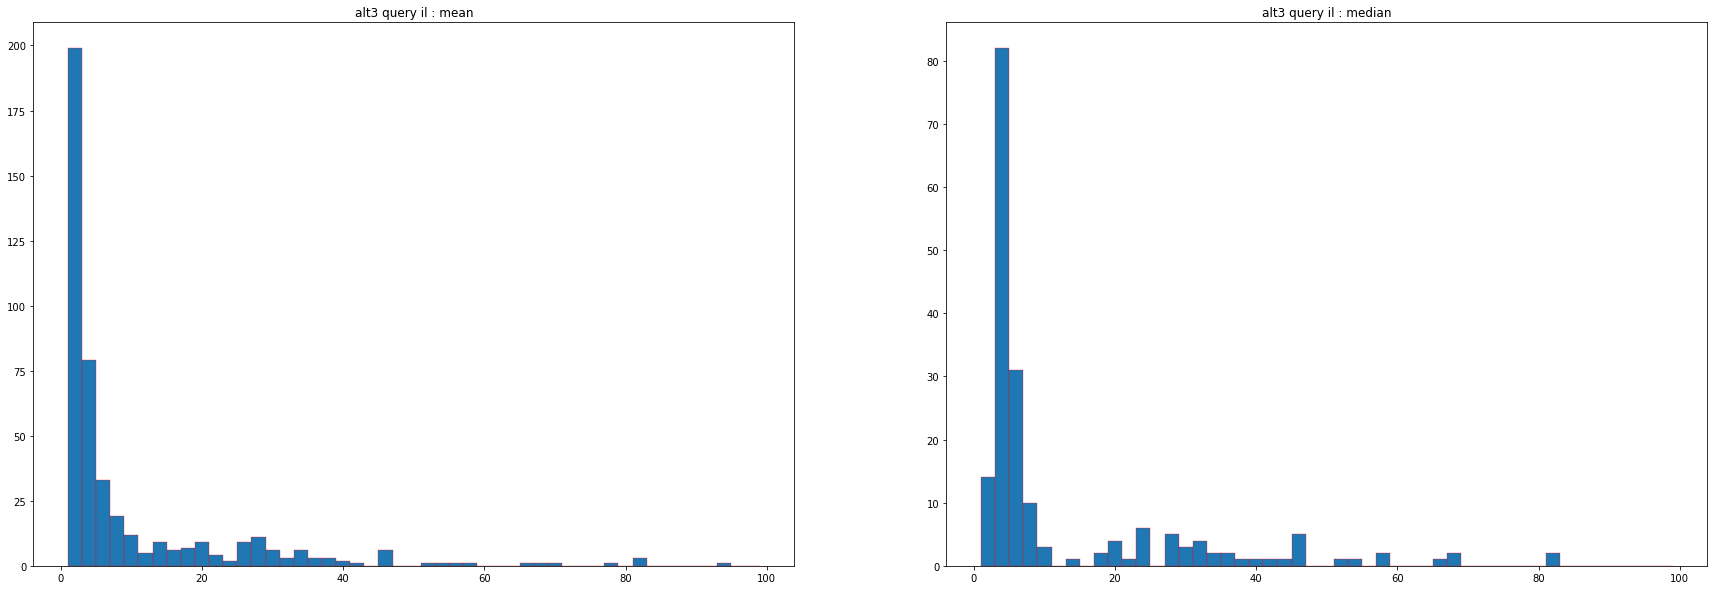

In [83]:
hist_loop(ilmeans,ilmedians,'il',1,100,False,2)